In [1]:
import tensorflow as tf
import numpy as np
import os
import matplotlib.pyplot as plt
# Config matplotlib backend as plotting inline Jupyter
%matplotlib inline

## Sigmoid Example - Feeding inputs with a Placeholder
Here we calculate the sigmoid example by feeding in inputs with a placeholder

In [6]:
# Defining the graph and session
graph = tf.Graph() # Creates a graph
session = tf.InteractiveSession(graph=graph) # Create a session

# Building the graph

# A placeholder is a symbolic input
x = tf.placeholder(shape=[1, 10], dtype=tf.float32, name='x')

# Variable
W = tf.Variable(tf.random_uniform(shape=[10,5], minval=-0.1, maxval=0.1, dtype=tf.float32), name='W')

# Variable
b = tf.Variable(tf.zeros(shape=[5], dtype=tf.float32), name='b')

h = tf.nn.sigmoid(tf.matmul(x, W) +b) # Operation to be performed

# Executing operations and evaluating nodes in the graph
tf.global_variables_initializer().run() # Initialize the variables

# Run the operations by providing a value to the symbolic input x
h_eval = session.run(h, feed_dict={x: np.random.rand(1, 10)})

print(h_eval)

session.close() # Frees all the resources associated with the session


[[0.53102297 0.5253095  0.46416563 0.50012714 0.42937475]]


## Feeding inputs as Tensorflow tensors

Now we make the same calculations with the input as an immutable tensor

In [2]:
# Define the graph and session
graph = tf.Graph() # creates a graph
session = tf.InteractiveSession(graph=graph)

# Building the graph

# A pre loaded input
x = tf.constant(value=[[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]], dtype=tf.float32, name='x')

# Variable
W = tf.Variable(tf.random_uniform(shape=[10, 5], minval=-0.1, maxval=0.1, dtype=tf.float32), name='W')
# Variable
b = tf.Variable(tf.zeros(shape=[5], dtype=tf.float32), name='b')

h = tf.nn.sigmoid(tf.matmul(x, W) + b) # Operatiion to be performed

# Executing operations and evaluating nodes in the graph
tf.global_variables_initializer().run() # Initialize the variables

# Run the operation without feed_dict
h_eval = session.run(h)

print(h_eval)


# Close the session to free any held resources by the session
session.close()






[[0.48912004 0.51164365 0.4344215  0.51379144 0.46977106]]


## Creating a Tensorflow Data Pipeline

We now create data pipeline to read inputs. Data pipeline is an efficient way of reading data when you have to read lots of data stored externally.  

In [14]:
# Defining the graph and session
graph = tf.Graph() # Creates a graph
session = tf.InteractiveSession(graph=graph) # Creates a session

# The filename queue
filenames = ['test%d.txt'%i for i in range(1,4)]
filename_queue = tf.train.string_input_producer(filenames, capacity=3, shuffle=True,name='string_input_producer')

# check if all files are there
for f in filenames:
    if not tf.gfile.Exists(f):
        raise ValueError('Failed to find file: ' + f)
    else:
        print('File %s found.'%f)

# Reader which takes a filename queue and 
# read() which outputs data one by one
reader = tf.TextLineReader()

# ready the data of the file and output as key,value pairs 
# We're discarding the key
key, value = reader.read(filename_queue, name='text_read_op')

# if any problems encountered with reading file 
# this is the value returned
record_defaults = [[-1.0], [-1.0], [-1.0], [-1.0], [-1.0], [-1.0], [-1.0], [-1.0], [-1.0], [-1.0]]

# decoding the read value to columns
col1, col2, col3, col4, col5, col6, col7, col8, col9, col10 = tf.decode_csv(value, record_defaults=record_defaults)
features = tf.stack([col1, col2, col3, col4, col5, col6, col7, col8, col9, col10])

# output x is randomly assigned a batch of data of batch_size 
# where the data is read from the txt files
x = tf.train.shuffle_batch([features], batch_size=3,
                           capacity=5, name='data_batch', 
                           min_after_dequeue=1,num_threads=1)

# QueueRunner retrieve data from queues and we need to explicitly start them
# Coordinator coordinates multiple QueueRunners
coord = tf.train.Coordinator()
threads = tf.train.start_queue_runners(coord=coord, sess=session)

# Building the graph by defining the variables and calculations

W = tf.Variable(tf.random_uniform(shape=[10,5], minval=-0.1, maxval=0.1, dtype=tf.float32),name='W') # Variable
b = tf.Variable(tf.zeros(shape=[5],dtype=tf.float32),name='b') # Variable

h = tf.nn.sigmoid(tf.matmul(x,W) + b) # Operation to be performed

# Executing operations and evaluating nodes in the graph
tf.global_variables_initializer().run() # Initialize the variables

# Calculate h with x and print the results for 5 steps
for step in range(5):
    x_eval, h_eval = session.run([x,h]) 
    print('========== Step %d =========='%step)
    print('Evaluated data (x)')
    print(x_eval)
    print('Evaluated data (h)')
    print(h_eval)
    print('')

# We also need to explicitly stop the coordinator 
# otherwise the process will hang indefinitely
coord.request_stop()
coord.join(threads)
session.close()

File test1.txt found.
File test2.txt found.
File test3.txt found.
========== Step 0 ==========
Evaluated data (x)
[[1.  0.9 0.8 0.7 0.6 0.5 0.4 0.3 0.2 0.1]
 [1.  0.9 0.8 0.7 0.6 0.5 0.4 0.3 0.2 0.1]
 [1.  0.9 0.8 0.7 0.6 0.5 0.4 0.3 0.2 0.1]]
Evaluated data (h)
[[0.47744218 0.47523373 0.49616155 0.5351027  0.47746912]
 [0.47744218 0.47523373 0.49616155 0.5351027  0.47746912]
 [0.47744218 0.47523373 0.49616158 0.53510267 0.47746912]]

========== Step 1 ==========
Evaluated data (x)
[[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
 [0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
 [1.  0.9 0.8 0.7 0.6 0.5 0.4 0.3 0.2 0.1]]
Evaluated data (h)
[[0.484695   0.45408896 0.49138135 0.5210847  0.48140827]
 [0.484695   0.45408896 0.49138135 0.5210847  0.48140827]
 [0.47744218 0.47523373 0.49616158 0.53510267 0.47746912]]

========== Step 2 ==========
Evaluated data (x)
[[1.  0.9 0.8 0.7 0.6 0.5 0.4 0.3 0.2 0.1]
 [0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
 [0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]]
Evaluated 

In [3]:
filenames = ['test%d.txt'%i for i in range(1,4)]

In [8]:
filenames
filename_queue = tf.train.string_input_producer(filenames, capacity=3, shuffle=True, name='string_input_producer')

In [9]:
filename_queue

## Comparison Operators

Here we discuss some operators that allows us to compare two tensors element-wise

In [3]:
# Defining the graph and session
graph = tf.Graph() # Creates a graph
session = tf.InteractiveSession(graph=graph) # Creates a session

# Let's assume the following values for x and y
# x (2-D tensor) => [[1,2], [3,4]]
# y (2-D tensor) => [[4,3], [3,2]]
x = tf.constant([[1,2], [3,4]], dtype=tf.int32)
y = tf.constant([[4,3], [3,2]], dtype=tf.int32 )

# Checks if two tensors are equal element-wise and returns a boolean tensor
# x_equal_y => [[False, False], [True, False]]
x_equal_y = tf.equal(x, y, name=None)

# Checks if x is greater or equal element-wise and returns a boolean tensor
# x_less_y => [[True, True], [True, False]]
x_less_y = tf.less(x, y, name=None)

# Checks if x is greater or equal than y element-wise and returns a boolean tensor
# x_great_equal_y => [[False, False], [True, True]]
x_great_equal_y = tf.greater_equal(x, y, name=None)

# Selects elements from x and y depending on whether,
# the condition is satisfied (select element from x)
# or the condition failed (select elements from y)
condition = tf.constant([[True, False], [True, False]], dtype=tf.bool)
# x_cond_y => [[1,3], [3,2]]
x_cond_y = tf.where(condition, x, y, name=None)

print('Is X == Y (element-wise)?')
print(session.run(x_equal_y))

print('\nIs X < Y (element-wise)?')
print(session.run(x_less_y))

print('\nIs X >= Y (element-wise)?')
print(session.run(x_great_equal_y))

print('\nX or Y depending on the condition (element-wise).')
print(session.run(x_cond_y))

session.close()

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Is X == Y (element-wise)?
[[False False]
 [ True False]]

Is X < Y (element-wise)?
[[ True  True]
 [False False]]

Is X >= Y (element-wise)?
[[False False]
 [ True  True]]

X or Y depending on the condition (element-wise).
[[1 3]
 [3 2]]


## Mathematical Operations

Here we perform several mathematical opeartions you are often comfortable with

In [5]:
# Defining the graph and session 
graph = tf.Graph()
session = tf.InteractiveSession(graph=graph) # Creates a session

# Let's assume the following values x and y
# x (2-D tensor) => [[1,2], [3, 4]]
# y (2-D tensor) => [[4,3], [3,2]]
x = tf.constant([[1,2], [3,4]], dtype=tf.float32)
y = tf.constant([[4,3], [3,2]], dtype=tf.float32)

# Add two tensors x and y in an element-wise fashion
# x_add_y => [[5,5], [6,6]]
x_add_y = tf.add(x,y)

# Performs matrix multiplication (Dot Product) (not element-wise)
# x_mul_y = [[10,7],[24,17]]
x_mul_y = tf.matmul(x, y)

# Compute natural logarithm of x element-wise
# equavilent to computing ln(x)
# log_x => [[0, 0.6931], [1.0986, 1.3863]]
log_x = tf.log(x)

# Performs reduction operation across the specified axis
# x_sum_1 => [3,7]
x_sum_1 = tf.reduce_sum(x, axis=[1], keepdims=False)

# x_sum_2 => [[4], [6]]
x_sum_2 = tf.reduce_sum(x, axis=[0], keepdims=True)

# Segments the tensor according to segment_ids (items with
# same id in the same segment) and computes a segmented sum of the data

data = tf.constant([1,2,3,4,5,6,7,8,9,10], dtype=tf.int32)
segment_ids = tf.constant([0,0,0,1,1,2,2,2,2,2], dtype=tf.int32)
# x_seg_sum => [6,9,40]
x_seg_sum = tf.segment_sum(data, segment_ids)

print('X + Y')
print(session.run(x_add_y))

print('\n XY')
print(session.run(x_mul_y))

print('\n log(x)')
print(session.run(log_x))

print('\n X sum over axis 1')
print(session.run(x_sum_1))

print('\n X sum over axis 2')
print(session.run(x_sum_2))

print('\n Segmented sum of a vector')
print(session.run(x_seg_sum))

X + Y
[[5. 5.]
 [6. 6.]]

 XY
[[10.  7.]
 [24. 17.]]

 log(x)
[[0.        0.6931472]
 [1.0986123 1.3862944]]

 X sum over axis 1
[3. 7.]

 X sum over axis 2
[[4. 6.]]

 Segmented sum of a vector
[ 6  9 40]


C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1735: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


## Scatter and Gather Operations

Scatter operation can distributed a set of values to specific positions of a tensor, where the gather operation can obtain a slice of a tensor specified by a set of indices.

In [12]:
# Defining the graph and session
graph = tf.Graph()
session = tf.InteractiveSession(graph=graph) # Creates a session

# 1-D scatter operation
ref = tf.Variable(tf.constant([1, 9, 3, 10, 5], dtype=tf.float32), name = 'scatter_update')
indices = [1,3]
updates = tf.constant([2,4], dtype=tf.float32)
tf_scatter_update = tf.scatter_update(ref, indices, updates, use_locking=None, name=None)

tf.global_variables_initializer().run() # Initialize the variables
print('\nScatter Update Operation for 1-D')
print(session.run(tf_scatter_update))

# n-D scatter operation 
indices = [[1], [3]]
updates = tf.constant([[1, 1, 1], [2, 2, 2]])
shape = [4, 3]
tf_scatter_nd_1 = tf.scatter_nd(indices, updates, shape, name=None)
print('\nScatter Operation for n-D')
print(session.run(tf_scatter_nd_1))


# n-D scatter operation
indices = [[1, 0], [3, 1]] # 2 x 2
updates = tf.constant([1, 2]) # 2 x 1
shape = [4, 3] # 2
tf_scatter_nd_2 = tf.scatter_nd(indices, updates, shape, name=None)

print('\nScatter Operation n-D')
print(session.run(tf_scatter_nd_2))


# 1-D gather operation
params = tf.constant([1, 2, 3, 4, 5], dtype=tf.float32)
indices = [1, 4]
tf_gather = tf.gather(params, indices, validate_indices=True, name=None) #=> [2, 5]
print('\nGather Operation for n-D')
print(session.run(tf_gather))


#n-D gather operation
params = tf.constant([[0,0,0],[1,1,1],[2,2,2],[3,3,3]], dtype=tf.float32)
indices = [[0], [2]]
tf_gather_nd = tf.gather_nd(params, indices, name=None) # => [[0, 0, 0], [2, 2, 2]]
print('\n Gather Operation for n-D')
print(session.run(tf_gather_nd))

params = tf.constant([[0,0,0],[1,1,1],[2,2,2],[3,3,3]],dtype=tf.float32)
indices = [[0, 1], [2, 2]]
tf_gather_nd_2 = tf.gather_nd(params, indices, name=None) # => [0, 2]
print('\n Gather Operation for n-D')
print(session.run(tf_gather_nd_2))

session.close()





Scatter Update Operation for 1-D
[1. 2. 3. 4. 5.]

Scatter Operation for n-D
[[0 0 0]
 [1 1 1]
 [0 0 0]
 [2 2 2]]

Scatter Operation n-D
[[0 0 0]
 [1 0 0]
 [0 0 0]
 [0 2 0]]

Gather Operation for n-D
[2. 5.]

 Gather Operation for n-D
[[0. 0. 0.]
 [2. 2. 2.]]

 Gather Operation for n-D
[0. 2.]


## 2-Dimensional Operations (2D Convolution and 2D Max pooling)

2D Convolution and Max pooling are two operation you perform on a tensor over the width and height axes. These operations are often used in convolution neural networks.

In [2]:
# Definiing the graph and session
graph = tf.Graph() # Creates a graph
session = tf.InteractiveSession(graph=graph) # Creates a session

x = tf.constant([[
    
        [[1],[2],[3],[4]],
        [[4],[3],[2],[1]],
        [[5],[6],[7],[8]],
        [[8],[7],[6],[5]]
    
]],

dtype=tf.float32)

x_filter = tf.constant(

    [
        [
            [[0.5]],[[1]]
        ],
        [
            [[0.5]],[[1]]
        ]
    ], dtype=tf.float32)

x_stride = [1, 1, 1, 1]

x_padding = 'VALID'

x_conv = tf.nn.conv2d(

    input = x, filter = x_filter,
    strides = x_stride, padding = x_padding

)


print('\n2-D Convolution Operation')
print(session.run(x_conv))

x = tf.constant(
    
   [[
        [[1],[2],[3],[4]],
        [[4],[3],[2],[1]],
        [[5],[6],[7],[8]],
        [[8],[7],[6],[5]]
    ]], dtype = tf.float32)


x_ksize = [1, 2, 2, 1]
x_stride = [1, 2, 2, 1]
x_padding = 'VALID'

x_pool = tf.nn.max_pool(

    value = x, ksize = x_ksize,
    strides = x_stride, padding = x_padding
)


print('\nMax Pooling Operation')
print(session.run(x_pool))

session.close()


2-D Convolution Operation
[[[[ 7.5]
   [ 7.5]
   [ 7.5]]

  [[13.5]
   [13.5]
   [13.5]]

  [[19.5]
   [19.5]
   [19.5]]]]

Max Pooling Operation
[[[[4.]
   [4.]]

  [[8.]
   [8.]]]]


## Loss Functions

Here we define several well-known loss functions that are commonly used in optimizing neural networks.
1. Mean Squared Error (MSE)
 * $MSE = (1/N)\sum_{i=1}^{N} {(x_i-\hat{x}_i)}^2$
 
2. Cross Entropy Loss (CE)
 * $CE = -(1/N)\sum_{i=1}^{N}y_ilog(\hat{y}_i) + (1-y_i)log(1-\hat{y}_i)$

In [6]:
# Defining the graph and session
graph = tf.Graph()
session = tf.InteractiveSession(graph=graph) # Creates a session

# Returns half of L2 norm of t given by sum(t**2)/2
x = tf.constant([[2, 4], [6, 8]], dtype = tf.float32)
x_hat = tf.constant([[1, 2], [3, 4]], dtype=tf.float32)
# MSE = (1**2 + 2**2 + 3**2 + 4**2)/2 = 15
MSE = tf.nn.l2_loss(x-x_hat)

# A common loss function used in neural networks to optimize the network
# Calculating the cross_entropy with Logits (unnormalized outputs of the last layer)
# instead of outputs leads to better numerical stabilities

y = tf.constant([[1,0],[0,1]], dtype=tf.float32)
y_hat = tf.constant([[3, 1], [2, 5]], dtype = tf.float32)
# This function alone doesn't average the cross entropy losses of all data points,
# You need to do that manually using reduce_mean function
CE = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits = y_hat, labels=y))

print('MSE Losses: ', session.run(MSE))
print('CE Losses: ', session.run(CE))

MSE Losses:  15.0
CE Losses:  0.08775769


## Stochastic Optimization

Here we discuss how to implement optimization with TensorFlow. The objective of this example is to find the mininum point of a given function. For this example, we will use a simple quadratic function where  𝑦=𝑥2 . We will start at an arbitrary point (say  𝑥=2 ) and keep minimizing  𝑦  until we reach the minimum  𝑦 .

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Step:  0 , x:  1.6 , y:  4.0
Step:  1 , x:  1.28 , y:  2.5600002
Step:  2 , x:  1.0239999 , y:  1.6384
Step:  3 , x:  0.8191999 , y:  1.0485759
Step:  4 , x:  0.6553599 , y:  0.6710885


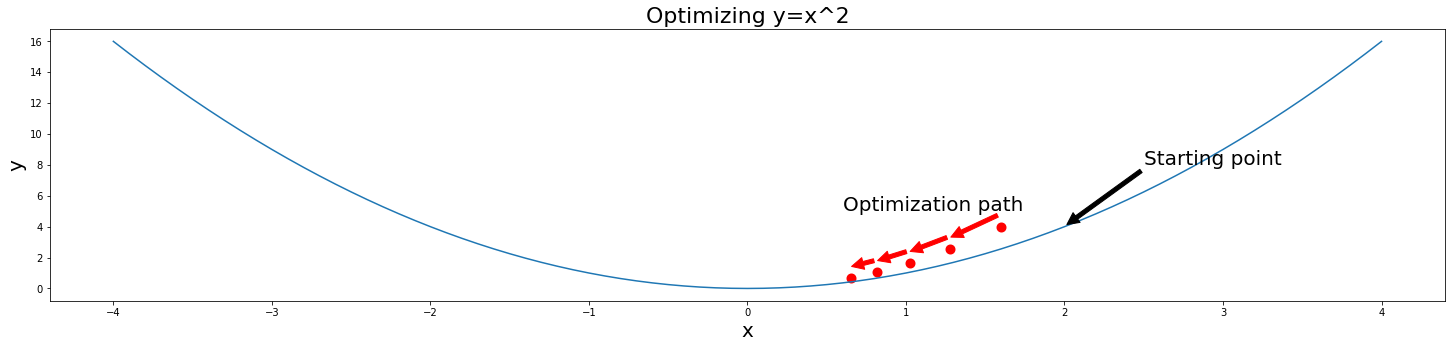

In [2]:
graph = tf.Graph()
session = tf.InteractiveSession() # Creates a session 

# Optimizer play the role in tuning neural network parameters so that their task error is minimal
# For example task error can be the cross_entropy error for a classication task

tf_x = tf.Variable(tf.constant(2.0, dtype=tf.float32, name='x'))
tf_y = tf_x ** 2
minimize_op = tf.train.GradientDescentOptimizer(learning_rate= 0.1).minimize(tf_y)

x_series, y_series = [], []
tf.global_variables_initializer().run()
for step in range(5):
    _, x, y = session.run([minimize_op, tf_x, tf_y])
    print('Step: ', step, ', x: ',x, ', y: ', y)
    x_series.append(x)
    y_series.append(y)
    
    
    
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(w=25, h=5)
ax.plot(np.arange(-4, 4.1, 0.1), np.arange(-4, 4.1, 0.1)**2)
ax.scatter(x_series, y_series, c='red', linewidths=4)

x_offset, y_offset = 0.02, 0.75
ax.annotate('Starting point', xy=(2.01, 4.1), xytext=(2.5, 8),
           arrowprops=dict(facecolor='black', shrink=0.01), fontsize=20)

ax.annotate('Optimization path', xy=(2.01, 4.1), xytext=(0.6, 5),
           arrowprops=None, fontsize=20)


for index, (x,y) in enumerate(zip(x_series, y_series)):
    if index == len(x_series) - 1:
        break
    ax.annotate('', xy=(x_series[index+1], y_series[index+1] + y_offset), xytext= (x - x_offset, y + y_offset),
                arrowprops=dict(facecolor='red', edgecolor='red', shrink=0.01), fontsize=20)
    
    
ax.set_xlabel('x', fontsize=20)
ax.set_ylabel('y', fontsize=20)
ax.set_title('Optimizing y=x^2', fontsize=22)
fig.savefig('optimization.jpg')
session.close()




## Using tf.control_dependencies(...) Operation

In [2]:
# if you don't pass a graph, the default_graph will be used by Tensorflow as the graph 
session = tf.InteractiveSession()

x = tf.Variable(tf.constant(2.0), name='x')
x_assign_op = tf.assign(x, x+5)
z = x * 2

tf.global_variables_initializer().run()

print('z=', session.run(z))
print('x=', session.run(x))

session.close()

z= 4.0
x= 2.0


In [3]:
session = tf.InteractiveSession()

x = tf.Variable(tf.constant(2.0), name='x')
with tf.control_dependencies([tf.assign(x, x+5)]):
    z = x*2
    
tf.global_variables_initializer().run()

print('z =', session.run(z))
print('x = ', session.run(x))

session.close()

z = 14.0
x =  7.0


## Variable Scoping

Here we will see how we can use variable scoping to reuse variables during the execution of the code. First we will see that TensorFlow creates variables everytime we execute code if scoping is not used. Then we look at how to solve this issue with scoping

In [4]:
tf.reset_default_graph() 
# Defining the graph and session
session = tf.InteractiveSession() # Creates a session with default graph

def very_simple_computation(w):
    x = tf.Variable(tf.constant(5.0, shape=None, dtype=tf.float32), name='x')
    y = tf.Variable(tf.constant(2.0, shape=None, dtype=tf.float32, name='y'))
    z = x * w + y ** 2
    return z

z1 = very_simple_computation(2)

for _  in range(10):
    z1 = very_simple_computation(2)
    
tf.global_variables_initializer().run()

print(session.run(z1))

print([v.name for v in tf.global_variables()])
session.close()

14.0
['x:0', 'Variable:0', 'x_1:0', 'Variable_1:0', 'x_2:0', 'Variable_2:0', 'x_3:0', 'Variable_3:0', 'x_4:0', 'Variable_4:0', 'x_5:0', 'Variable_5:0', 'x_6:0', 'Variable_6:0', 'x_7:0', 'Variable_7:0', 'x_8:0', 'Variable_8:0', 'x_9:0', 'Variable_9:0', 'x_10:0', 'Variable_10:0']


In [5]:
graph = tf.reset_default_graph()
# Defining the graph and session
session = tf.InteractiveSession(graph=graph) # Creates a session

def not_so_simple_computation(w):
    x = tf.get_variable('x', initializer= tf.constant(5.0, shape=None, dtype=tf.float32))
    y = tf.get_variable('y', initializer = tf.constant(2.0, shape=None, dtype=tf.float32))
    z = x * w + y **2
    return z

def another_not_so_simple_computation(w):
    x = tf.get_variable('x', initializer=tf.constant(5.0, shape=None, dtype=tf.float32))
    y = tf.get_variable('y', initializer=tf.constant(2.0, shape=None, dtype=tf.float32))
    z = w * x * y
    return z

# Since this is the first call, the variables will be created with following names
# x => scopeA/x, y => scopeA/y
with tf.variable_scope('scopeA'):
    z1 = not_so_simple_computation(tf.constant(1.0, dtype=tf.float32))
# scopeA/x and scopeA/y already created. We reuse them
with tf.variable_scope('scopeA', reuse=True):
    z2 = another_not_so_simple_computation(z1)
    

# Since this is the first call, the variables will be created with following names
# x => scopeB/x, y => scopeB/y

with tf.variable_scope('scopeB'):
    a1 = not_so_simple_computation(tf.constant(1.0, dtype=tf.float32))


# scopeB/x and scopeB/y already created. We reuse them.
with tf.variable_scope('scopeB', reuse=True):
    a2 = another_not_so_simple_computation(a1)
    
# Say we want to reuse the "scopeA" scope again, since variables are already created
# we should set "reuse" argument to True when invoking the scope
with tf.variable_scope('scopeA', reuse=True):
    zz1 = not_so_simple_computation(tf.constant(1.0, dtype=tf.float32))
    zz2 = another_not_so_simple_computation(z1)
    
tf.global_variables_initializer().run()
print(session.run([z1,z2,a1,a2,zz1,zz2]))
print([v.name for v in tf.global_variables()])


session.close()

[9.0, 90.0, 9.0, 90.0, 9.0, 90.0]
['scopeA/x:0', 'scopeA/y:0', 'scopeB/x:0', 'scopeB/y:0']


## MNIST Classification

## Download and Prepare Data

The code below downloads the MNIST data set from source, reshapes the images to [number_of_training_samples, single_image_size] matrix and standardize (make zero-mean unit-variance) images. Then we do the same for testing images as well.

In [2]:
import struct 
import gzip
import os 
from six.moves.urllib.request import urlretrieve 

In [9]:
def maybe_download(url, filename, expected_bytes, force=False):
    """Download a file if not present, and make sure it's the right size."""
    if force or not os.path.exists(filename):
        print('Attempting to download:', filename)
        filename, _ = urlretrieve(url + filename, filename)
        print('\nDownload Complete!')
        
    statinfo = os.stat(filename)
    if statinfo.st_size == expected_bytes:
        print('Found and verified', filename)
    else:
        raise Exception('Failed to verify ' + filename + '.Can you get to it with a browser?')
    return filename
    
def read_mnist(fname_img, fname_lbl):
    print('\nReading files %s and %s'% (fname_img, fname_lbl))
    
    with gzip.open(fname_img) as fimg:
        magic, num, rows, cols = struct.unpack(">IIII", fimg.read(16))
        print(num, cols, rows)
        img = (np.frombuffer(fimg.read(num*rows*cols), dtype=np.uint8).reshape(num, rows * cols)).astype(np.float32)
        print('(Images) Returned a tensor of shape ',img.shape)
        
        
        img = (img - np.mean(img))/np.std(img)
        
    with gzip.open(fname_lbl) as flbl:
        # flbl.read(8) reads up to 8 bytes
        magic, num = struct.unpack(">II", flbl.read(8))
        lbl = np.frombuffer(flbl.read(num), dtype=np.int8)
        print('(Labels) Returned a tensor of shape: %s'%lbl.shape)
        print('Sample labels: ', lbl[:10])
        
        
        
    return img, lbl


# Download data if needed 
url = 'http://yann.lecun.com/exdb/mnist/'
# training data
maybe_download(url,'train-images-idx3-ubyte.gz',9912422)
maybe_download(url,'train-labels-idx1-ubyte.gz',28881)
# testing data
maybe_download(url,'t10k-images-idx3-ubyte.gz',1648877)
maybe_download(url,'t10k-labels-idx1-ubyte.gz',4542)


        
        
# Read the training data and the test data
train_inputs,  train_labels = read_mnist('train-images-idx3-ubyte.gz', 'train-labels-idx1-ubyte.gz')
test_inputs, test_labels = read_mnist('t10k-images-idx3-ubyte.gz', 't10k-labels-idx1-ubyte.gz')
        
        
        


Found and verified train-images-idx3-ubyte.gz
Found and verified train-labels-idx1-ubyte.gz
Found and verified t10k-images-idx3-ubyte.gz
Found and verified t10k-labels-idx1-ubyte.gz

Reading files train-images-idx3-ubyte.gz and train-labels-idx1-ubyte.gz
60000 28 28
(Images) Returned a tensor of shape  (60000, 784)
(Labels) Returned a tensor of shape: 60000
Sample labels:  [5 0 4 1 9 2 1 3 1 4]

Reading files t10k-images-idx3-ubyte.gz and t10k-labels-idx1-ubyte.gz
10000 28 28
(Images) Returned a tensor of shape  (10000, 784)
(Labels) Returned a tensor of shape: 10000
Sample labels:  [7 2 1 0 4 1 4 9 5 9]
